In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16997,-122.27,37.54,5.0,2140.0,420.0,990.0,394.0,6.0350,438800.0,NEAR BAY
8011,-118.12,33.85,37.0,2584.0,453.0,1333.0,481.0,4.3661,219900.0,<1H OCEAN
1966,-120.59,38.76,21.0,1728.0,417.0,731.0,334.0,1.7266,94700.0,INLAND
17087,-122.21,37.47,43.0,733.0,162.0,497.0,175.0,3.2708,255300.0,NEAR OCEAN
13323,-117.64,34.06,43.0,763.0,219.0,851.0,198.0,1.7292,79200.0,INLAND


In [3]:
housing_data = housing_data.dropna()

In [4]:
housing_data.shape

(20433, 10)

In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [7]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [8]:
housing_data.shape

(19475, 10)

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [12]:
housing_data.shape

(19475, 14)

In [13]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10688,-117.72,33.62,21.0,2322.0,518.0,662.0,457.0,3.1679,110000.0,1,0,0,0,0
1757,-122.33,37.95,42.0,1627.0,336.0,848.0,316.0,3.7708,144600.0,0,0,0,1,0
7802,-118.10,33.90,43.0,1237.0,243.0,776.0,246.0,4.3250,166000.0,1,0,0,0,0
13506,-117.33,34.12,33.0,933.0,219.0,838.0,211.0,1.3417,69000.0,0,1,0,0,0
7227,-118.16,34.01,37.0,690.0,261.0,952.0,255.0,1.6354,158900.0,1,0,0,0,0


In [14]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [15]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [18]:
y_train.shape, y_test.shape

((15580,), (3895,))

### Train a linear model for price prediction

In [31]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True, fit_intercept=False).fit(x_train, y_train)

In [32]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.6109576965215393


In [21]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [22]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

ocean_proximity_INLAND       -2.092306e+06
ocean_proximity_NEAR BAY     -2.058592e+06
ocean_proximity_<1H OCEAN    -2.053900e+06
ocean_proximity_NEAR OCEAN   -2.048469e+06
ocean_proximity_ISLAND       -1.881442e+06
longitude                    -2.405704e+04
latitude                     -2.226541e+04
population                   -2.828341e+01
total_rooms                  -8.041773e+00
households                    3.794611e+01
total_bedrooms                9.545820e+01
housing_median_age            9.123890e+02
median_income                 3.856123e+04
dtype: float64


In [23]:
y_pred = linear_model.predict(x_test)

In [24]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
18836,52285.003760,71200.0
10124,280245.724430,291700.0
4415,203870.362086,189400.0
5446,246891.933505,324300.0
15903,252691.634452,284900.0
1384,257114.543361,206700.0
17834,290742.363262,266900.0
18881,174144.536464,109400.0
3375,205675.949632,197600.0
5755,285785.167373,358000.0


In [25]:
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.6200944107003351


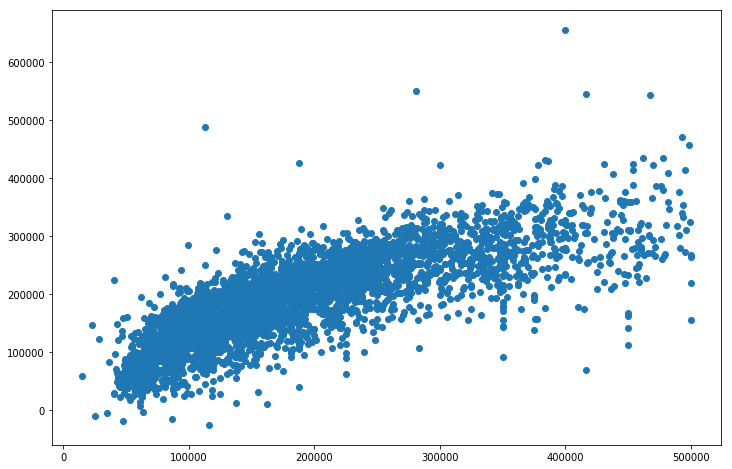

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [27]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [28]:
df_pred_actual_sample.head()

,index,predicted,actual
0,3804,181693.761101,241300.0
1,7134,126411.971211,183300.0
2,889,309292.645291,333400.0
3,18668,287116.902936,322300.0
4,5308,267792.348350,500000.0


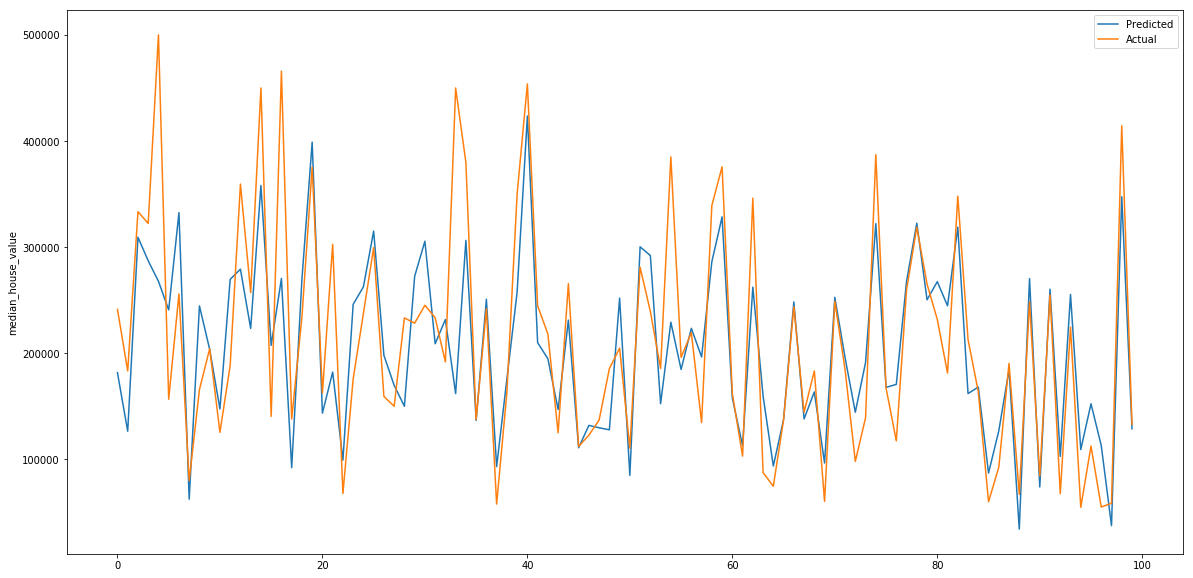

In [29]:
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()